# Optimal new generation - summary

In [1]:
# Third-party packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import datetime

# Local imports
from utils import get_data
from utils import tech_order, tech_colors
from utils import get_data_sftp

plt.style.use("style.txt")
pd.options.display.float_format = '{:,.2f}'.format

/var/folders/bd/5zkgv6rx32s3b0jx_9373xhc0000gn/T/ipykernel_70455/2545640790.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


### Notebook constants

In [2]:
hostname="shasta-db1.ream.ucsd.edu"
username="n7gonzalez"
scenario_name = ["scenario_190", "scenario_191", "scenario_192", "scenario_193", "scenario_194", "scenario_195", "scenario_196", "scenario_197",
                 "scenario_198", "scenario_199"]
savefig = False
folder_to_save_results="results/"
figure_names={"scenario_190": 1, "scenario_191": 2, "scenario_192": 3, "scenario_193": 4, "scenario_194" : 5, "scenario_195": 6,
              "scenario_196" : 9, "scenario_197" : 8, "scenario_198" : 9, "scenario_199": 10}

In [3]:
# columns = ["generation_project", "timestamp", "gen_tech", "tp_weight_in_year_hrs", "gen_load_zone", "DispatchGen_MW", "Curtailment_MW"]
# dispatch = get_data(scenario_name, 'dispatch.csv', usecols=columns)
# dispatch

In [4]:
for sc in scenario_name:
    path = '/Users/nataliagonzalez/Documents/UCSD PhD/2022/Research 2022/Wave Energy/run_results/'+str(sc)+'/outputs/dispatch.csv'
    dispatch_new = pd.read_csv(path, index_col=None)
    dispatch_new = dispatch_new[dispatch_new['period']==2050]
    dispatch_new['scenario'] = sc
    if sc == 'scenario_190':
        dispatch = dispatch_new
    else:
        dispatch = pd.concat([dispatch,dispatch_new])
dispatch.reset_index(inplace=True,drop=True)
dispatch=dispatch.replace({"scenario": figure_names})
dispatch = dispatch.astype({'scenario':'int'})
dispatch

,generation_project,timestamp,gen_dbid,gen_tech,gen_load_zone,gen_energy_source,tp_weight_in_year_hrs,period,is_renewable,DispatchGen_MW,Curtailment_MW,Energy_GWh_typical_yr,VariableOMCost_per_yr,DispatchEmissions_tCO2_per_typical_yr,DispatchEmissions_tNOx_per_typical_yr,DispatchEmissions_tSO2_per_typical_yr,DispatchEmissions_tCH4_per_typical_yr,scenario
0,77333,2050011303,77333,Wind,CA_SCE_CEN,Wind,8.11,2050,True,0.51,0.00,0.00,0.00,0.00,0,0,0,1
1,77333,2050011307,77333,Wind,CA_SCE_CEN,Wind,8.11,2050,True,2.48,0.00,0.02,0.00,0.00,0,0,0,1
2,77333,2050011311,77333,Wind,CA_SCE_CEN,Wind,8.11,2050,True,3.77,0.00,0.03,0.00,0.00,0,0,0,1
3,77333,2050011315,77333,Wind,CA_SCE_CEN,Wind,8.11,2050,True,2.84,0.00,0.02,0.00,0.00,0,0,0,1
4,77333,2050011319,77333,Wind,CA_SCE_CEN,Wind,8.11,2050,True,0.00,5.51,0.00,0.00,0.00,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11931835,1300000199,2050122107,1300000199,Offshore_Wind,CA_SDGE,Wind,8.11,2050,True,0.00,0.00,0.00,0.00,0.00,0,0,0,10
11931836,1300000199,2050122111,1300000199,Offshore_Wind,CA_SDGE,Wind,8.11,2050,True,0.00,0.00,0.00,0.00,0.00,0,0,0,10
11931837,1300000199,2050122115,1300000199,Offshore_Wind,CA_SDGE,Wind,8.11,2050,True,0.00,0.00,0.00,0.00,0.00,0,0,0,10
11931838,1300000199,2050122119,1300000199,Offshore_Wind,CA_SDGE,Wind,8.11,2050,True,0.00,0.00,0.00,0.00,0.00,0,0,0,10


In [5]:
dispatch["timestamp"]=pd.to_datetime(dispatch["timestamp"], format='%Y%m%d%H')
dispatch["timestamp"]=dispatch["timestamp"].dt.tz_localize('utc')
dispatch["timestamp"]=dispatch["timestamp"].dt.tz_convert('US/Pacific')
dispatch["datetime"] = pd.to_datetime(dispatch["timestamp"], format="%Y%m%d%H")
dispatch['time_of_day'] = dispatch['datetime'].dt.strftime('%H:%M')
dispatch

,generation_project,timestamp,gen_dbid,gen_tech,gen_load_zone,gen_energy_source,tp_weight_in_year_hrs,period,is_renewable,DispatchGen_MW,Curtailment_MW,Energy_GWh_typical_yr,VariableOMCost_per_yr,DispatchEmissions_tCO2_per_typical_yr,DispatchEmissions_tNOx_per_typical_yr,DispatchEmissions_tSO2_per_typical_yr,DispatchEmissions_tCH4_per_typical_yr,scenario,datetime,time_of_day
0,77333,2050-01-12 19:00:00-08:00,77333,Wind,CA_SCE_CEN,Wind,8.11,2050,True,0.51,0.00,0.00,0.00,0.00,0,0,0,1,2050-01-12 19:00:00-08:00,19:00
1,77333,2050-01-12 23:00:00-08:00,77333,Wind,CA_SCE_CEN,Wind,8.11,2050,True,2.48,0.00,0.02,0.00,0.00,0,0,0,1,2050-01-12 23:00:00-08:00,23:00
2,77333,2050-01-13 03:00:00-08:00,77333,Wind,CA_SCE_CEN,Wind,8.11,2050,True,3.77,0.00,0.03,0.00,0.00,0,0,0,1,2050-01-13 03:00:00-08:00,03:00
3,77333,2050-01-13 07:00:00-08:00,77333,Wind,CA_SCE_CEN,Wind,8.11,2050,True,2.84,0.00,0.02,0.00,0.00,0,0,0,1,2050-01-13 07:00:00-08:00,07:00
4,77333,2050-01-13 11:00:00-08:00,77333,Wind,CA_SCE_CEN,Wind,8.11,2050,True,0.00,5.51,0.00,0.00,0.00,0,0,0,1,2050-01-13 11:00:00-08:00,11:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11931835,1300000199,2050-12-20 23:00:00-08:00,1300000199,Offshore_Wind,CA_SDGE,Wind,8.11,2050,True,0.00,0.00,0.00,0.00,0.00,0,0,0,10,2050-12-20 23:00:00-08:00,23:00
11931836,1300000199,2050-12-21 03:00:00-08:00,1300000199,Offshore_Wind,CA_SDGE,Wind,8.11,2050,True,0.00,0.00,0.00,0.00,0.00,0,0,0,10,2050-12-21 03:00:00-08:00,03:00
11931837,1300000199,2050-12-21 07:00:00-08:00,1300000199,Offshore_Wind,CA_SDGE,Wind,8.11,2050,True,0.00,0.00,0.00,0.00,0.00,0,0,0,10,2050-12-21 07:00:00-08:00,07:00
11931838,1300000199,2050-12-21 11:00:00-08:00,1300000199,Offshore_Wind,CA_SDGE,Wind,8.11,2050,True,0.00,0.00,0.00,0.00,0.00,0,0,0,10,2050-12-21 11:00:00-08:00,11:00


In [6]:
dispatch.loc[:,'Dispatch_MWh'] = dispatch.apply(lambda x: (x['tp_weight_in_year_hrs']*x['DispatchGen_MW']), axis=1)

In [7]:
group_1 = dispatch[dispatch['scenario']<=5]
group_2 = dispatch[dispatch['scenario']>5]

In [ ]:
dispatch['gen_energy_source'].unique()

array(['Wind', 'Water', 'Uranium', 'Gas', 'Coal', 'Waste_Heat',
       'Bio_Solid', 'Solar', 'Bio_Gas', 'Geothermal', 'Electricity',
       'Bio_Liquid', 'Wave'], dtype=object)

In [8]:
s1 = dispatch[dispatch['scenario']==1]
s5 = dispatch[dispatch['scenario']==5]
s6 = dispatch[dispatch['scenario']==6]
s10 = dispatch[dispatch['scenario']==10]

In [ ]:
dispatch[['gen_tech','gen_energy_source']].drop_duplicates()

,gen_tech,gen_energy_source
0,Wind,Wind
27216,Hydro_NonPumped,Water
27648,Hydro_Pumped,Water
42336,Nuclear,Uranium
43632,CCGT,Gas
44928,Gas_Combustion_Turbine,Gas
51984,Coal_Steam_Turbine,Coal
103968,Gas_Steam_Turbine,Gas
109584,ST,Waste_Heat
116064,Bio_Solid_Steam_Turbine_Cogen,Bio_Solid


In [22]:
pivoted_1 = pd.pivot_table(s1, index='time_of_day', columns=s1.gen_tech, values="DispatchGen_MW", aggfunc=np.mean)
pivoted_1.loc[:,'Solar']=pivoted_1.apply(lambda x: sum(x[c] for c in ['Residential_PV','Commercial_PV','Central_PV']), axis=1)
pivoted_1.loc[:,'Thermal']=pivoted_1.apply(lambda x: sum(x[c] for c in ['Gas_Steam_Turbine_Cogen','Gas_Internal_Combustion_Engine_Cogen','Gas_Steam_Turbine','Gas_Combustion_Turbine',   
                                                                        'Gas_Combustion_Turbine_Cogen','CCGT','CCGT_Cogen','ST']), axis=1)
pivoted_1.loc[:,'Coal']=pivoted_1.apply(lambda x: sum(x[c] for c in ['Coal_Steam_Turbine','Coal_IGCC','Coal_Steam_Turbine_Cogen']), axis=1)
pivoted_1.loc[:,'CSP']=pivoted_1.apply(lambda x: sum(x[c] for c in ['CSP_Trough_No_Storage','CSP_Trough_6h_Storage']), axis=1)
pivoted_1.loc[:,'Biomass']=pivoted_1.apply(lambda x: sum(x[c] for c in ['Bio_Gas','Bio_Liquid_Steam_Turbine_Cogen','Bio_Solid_Steam_Turbine_Cogen','Bio_Gas_Internal_Combustion_Engine_Cogen']), axis=1)
pivoted_1.rename(columns={'Hydro_NonPumped':'Hydro','Hydro_Pumped':'Pumped Hydro','Battery_Storage':'Storage'},inplace=True)
pivoted_1 = pivoted_1[['Coal','Thermal','Nuclear','Geothermal','Biomass','Hydro','Pumped Hydro','Wind','Offshore_Wind','CSP','Solar','Wave','Storage']]
pivoted_1.index = pd.to_datetime(pivoted_1.index)
upsampled_1 = pivoted_1.resample('H')
interpolated_1 = upsampled_1.interpolate(method='linear')
interpolated_1.index = interpolated_1.index.time
interpolated_1 = interpolated_1.rename_axis(None, axis=1)
interpolated_1.index.rename('Time of Day', inplace=True)
interpolated_1

,Coal,Thermal,Nuclear,Geothermal,Biomass,Hydro,Pumped Hydro,Wind,Offshore_Wind,CSP,Solar,Wave,Storage
Time of Day,,,,,,,,,,,,,
01:00:00,0.00,2.85,"2,440.80",0.00,118.31,83.31,241.42,25.31,214.54,0.00,0.00,11.11,"1,008.13"
02:00:00,0.00,2.46,"2,440.80",0.00,69.13,48.78,19.93,39.57,232.31,0.00,0.00,9.00,901.29
03:00:00,0.00,2.91,"2,440.80",0.00,98.97,57.79,71.49,45.81,208.87,0.00,0.00,12.09,843.71
04:00:00,0.00,2.85,"2,440.80",0.00,95.61,66.13,143.69,35.02,191.57,0.00,1.05,11.01,505.94
05:00:00,0.00,2.79,"2,440.80",0.00,92.26,74.47,215.88,24.24,174.27,0.00,2.10,9.92,168.17
06:00:00,0.00,2.50,"2,440.80",0.00,64.98,30.65,14.61,39.03,209.69,0.00,13.10,7.71,273.81
07:00:00,0.00,2.91,"2,440.80",0.00,91.19,52.98,100.95,39.14,216.53,0.00,19.76,12.66,359.68
08:00:00,0.00,2.49,"2,440.80",0.00,80.25,61.26,94.53,28.13,186.61,0.00,52.23,10.92,179.84
09:00:00,0.00,2.08,"2,440.80",0.00,69.32,69.53,88.11,17.12,156.70,0.00,84.70,9.17,0.00


In [48]:
pivoted_2 = pd.pivot_table(s5, index='time_of_day', columns=s5.gen_tech, values="DispatchGen_MW", aggfunc=np.mean)
pivoted_2.loc[:,'Solar']=pivoted_2.apply(lambda x: sum(x[c] for c in ['Residential_PV','Commercial_PV','Central_PV']), axis=1)
#pivoted_2 = pivoted_2[['Solar','Wind','Offshore_Wind','Wave']]
pivoted_2.index = pd.to_datetime(pivoted_2.index)
upsampled_2 = pivoted_2.resample('H')
interpolated_2 = upsampled_2.interpolate(method='linear')
interpolated_2.index = interpolated_2.index.time
interpolated_2 = interpolated_2.rename_axis(None, axis=1)
interpolated_2.index.rename('Time of Day', inplace=True)

In [49]:
pivoted_3 = pd.pivot_table(s6, index='time_of_day', columns=s6.gen_tech, values="DispatchGen_MW", aggfunc=np.mean)
pivoted_3.loc[:,'Solar']=pivoted_3.apply(lambda x: sum(x[c] for c in ['Residential_PV','Commercial_PV','Central_PV']), axis=1)
#pivoted_3 = pivoted_3[['Solar','Wind','Offshore_Wind','Wave']]
pivoted_3.index = pd.to_datetime(pivoted_3.index)
upsampled_3 = pivoted_3.resample('H')
interpolated_3 = upsampled_3.interpolate(method='linear')
interpolated_3.index = interpolated_3.index.time
interpolated_3 = interpolated_3.rename_axis(None, axis=1)
interpolated_3.index.rename('Time of Day', inplace=True)

In [50]:
pivoted_4 = pd.pivot_table(s10, index='time_of_day', columns=s10.gen_tech, values="DispatchGen_MW", aggfunc=np.mean)
pivoted_4.loc[:,'Solar']=pivoted_4.apply(lambda x: sum(x[c] for c in ['Residential_PV','Commercial_PV','Central_PV']), axis=1)
#pivoted_4 = pivoted_4[['Solar','Wind','Offshore_Wind','Wave']]
pivoted_4.index = pd.to_datetime(pivoted_4.index)
upsampled_4 = pivoted_4.resample('H')
interpolated_4 = upsampled_4.interpolate(method='linear')
interpolated_4.index = interpolated_4.index.time
interpolated_4 = interpolated_4.rename_axis(None, axis=1)
interpolated_4.index.rename('Time of Day', inplace=True)

In [54]:
interpolated_1.columns

Index(['Battery_Storage', 'Bio_Gas',
       'Bio_Gas_Internal_Combustion_Engine_Cogen',
       'Bio_Liquid_Steam_Turbine_Cogen', 'Bio_Solid_Steam_Turbine_Cogen',
       'CCGT', 'CCGT_Cogen', 'CSP_Trough_6h_Storage', 'CSP_Trough_No_Storage',
       'Central_PV', 'Coal_IGCC', 'Coal_Steam_Turbine',
       'Coal_Steam_Turbine_Cogen', 'Commercial_PV', 'Gas_Combustion_Turbine',
       'Gas_Combustion_Turbine_Cogen', 'Gas_Internal_Combustion_Engine_Cogen',
       'Gas_Steam_Turbine', 'Gas_Steam_Turbine_Cogen', 'Geothermal',
       'Hydro_NonPumped', 'Hydro_Pumped', 'Nuclear', 'Offshore_Wind',
       'Residential_PV', 'ST', 'Wave', 'Wind', 'Solar'],
      dtype='object')

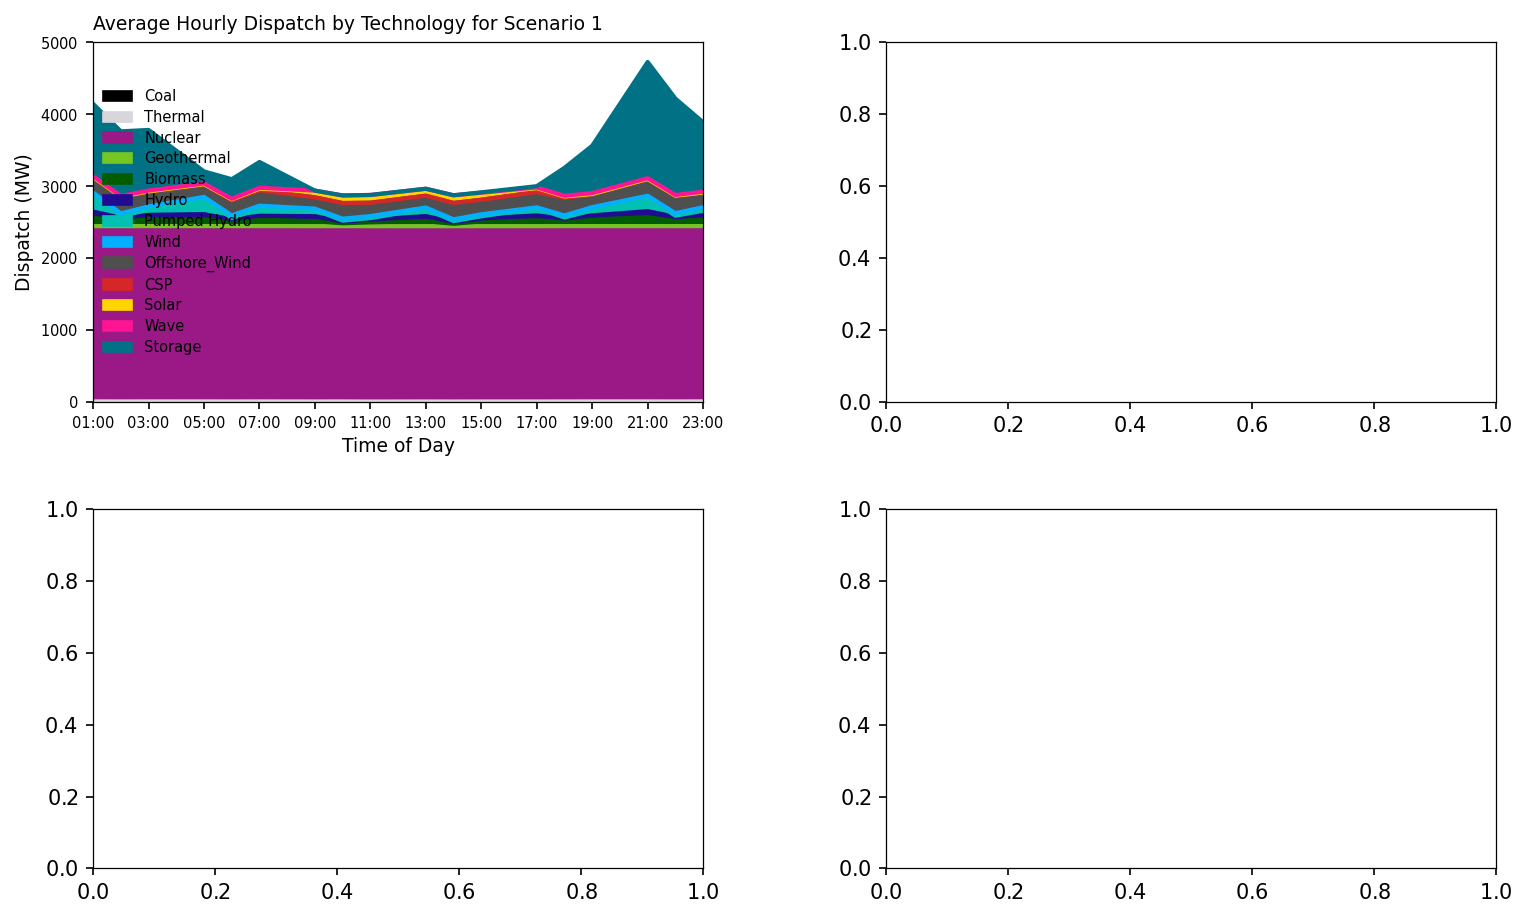

In [20]:
# Plot
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,6), dpi=150)
fig.patch.set_facecolor('white')
fig.tight_layout()
fig.subplots_adjust(wspace=.3)
fig.subplots_adjust(hspace=.3)

p = list(pd.date_range("01:00", "23:00", freq="H").strftime('%H:%M'))
t = list([p[0],p[2],p[4],p[6],p[8],p[10],p[12],p[14],p[16],p[18],p[20],p[22]])

interpolated_1[tech_order].plot.area(ax=ax1,fontsize=9,color=tech_colors)
ax1.set_xlabel('Time of Day',fontsize=9)
ax1.set_ylabel('Dispatch (MW)',fontsize=9)
ax1.set_xticks(t)
ax1.set_xlim(t[0],t[-1])
# ax1.set_ylim(-50,300)
ax1.tick_params(labelsize=7)
ax1.legend(fontsize=7, loc='center left')
ax1.set_title('Average Hourly Dispatch by Technology for Scenario 1',fontsize=9)

# interpolated_2.plot.area(ax=ax2,fontsize=9)
# ax2.set_xlabel('Time of Day',fontsize=9)
# ax2.set_ylabel('Dispatch (MW)',fontsize=9)
# ax2.set_xticks(t)
# ax2.set_xlim(t[0],t[-1])
# ax2.set_ylim(-50,300)
# ax2.tick_params(labelsize=7)
# ax2.legend(fontsize=7, loc='upper right')
# ax2.set_title('Average Hourly Dispatch by Technology for Scenario 5',fontsize=9)

# interpolated_3.plot.area(ax=ax3,fontsize=9)
# ax3.set_xlabel('Time of Day',fontsize=9)
# ax3.set_ylabel('Dispatch (MW)',fontsize=9)
# ax3.set_xticks(t)
# ax3.set_xlim(t[0],t[-1])
# ax3.set_ylim(-50,300)
# ax3.tick_params(labelsize=7)
# ax3.legend(fontsize=7, loc='center left')
# ax3.set_title('Average Hourly Dispatch by Technology for Scenario 6',fontsize=9)

# interpolated_4.plot.area(ax=ax4,fontsize=9)
# ax4.set_xlabel('Time of Day',fontsize=9)
# ax4.set_ylabel('Dispatch (MW)',fontsize=9)
# ax4.set_xticks(t)
# ax4.set_xlim(t[0],t[-1])
# ax4.set_ylim(-50,300)
# ax4.tick_params(labelsize=7)
# ax4.legend(fontsize=7, loc='upper right')
# ax4.set_title('Average Hourly Dispatch by Technology for Scenario 10',fontsize=9)

plt.savefig(folder_to_save_results+"Av Hourly Dispatch by Tech per Scenario.png", transparent=False)